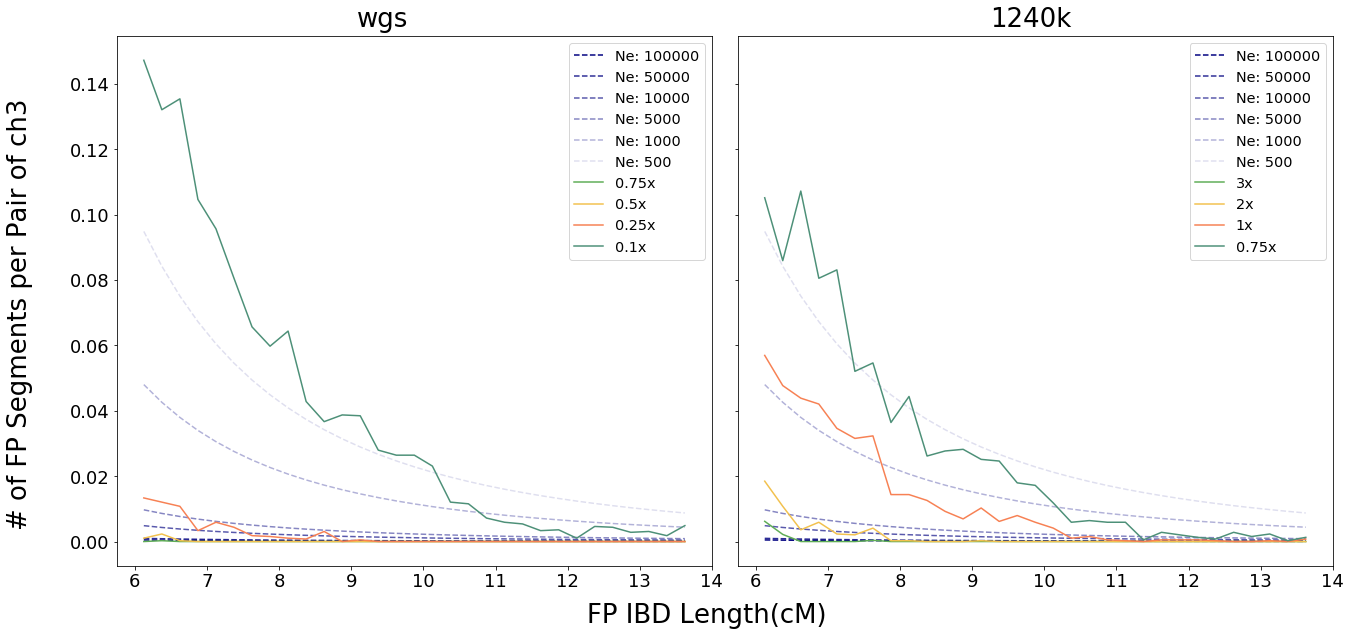

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 8), tight_layout=True)
bins = np.arange(6,14,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

color = 'navy'
Nes = [100000, 50000, 10000, 5000, 1000, 500]
for i, Ne in enumerate(Nes):
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    axs[0].plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=color, alpha=1.0-0.175*i)
    axs[1].plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=color, alpha=1.0-0.175*i)

############# plot wgs results ################
nsamples = [13, 13, 13, 13]
covs = ['cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}

colors = ['#5fad56', '#f2c14e', '#f78154', '#4d9078']
for cov, nsample, color in zip(covs, nsamples, colors):
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./wgs/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    axs[0].plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)), color=color, label=f'{cov2str[cov]}')

axs[0].legend(loc='upper right', fontsize='x-large')

################################ plot 1240k results ###########################

covs = ['cov3', 'cov2', 'cov1', 'cov3over4']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x'}
nsamples = [11, 13, 13, 13]
colors = ['#5fad56', '#f2c14e', '#f78154', '#4d9078']


for cov, nsample, color in zip(covs, nsamples, colors):
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./1240k/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    axs[1].plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)), color=color, label=f'{cov2str[cov]}')
axs[1].legend(loc='upper right', fontsize='x-large')


axs[0].tick_params(axis='both', labelsize=18)
axs[1].tick_params(axis='both', labelsize=18)
fig.text(0.25, 1.01, 'wgs', ha='center', va='center', fontsize=26)
fig.text(0.75, 1.01, '1240k', ha='center', va='center', fontsize=26)
fig.text(0.5, -0.025, 'FP IBD Length(cM)', ha='center', va='center', fontsize=26)
fig.text(-0.03, 0.5, '# of FP Segments per Pair of ch3', ha='center', va='center', rotation='vertical', fontsize=26)
plt.savefig('FP_navyhue.png', dpi=300, bbox_inches="tight")
plt.savefig('FP_navyhue.pdf', dpi=300, bbox_inches="tight")

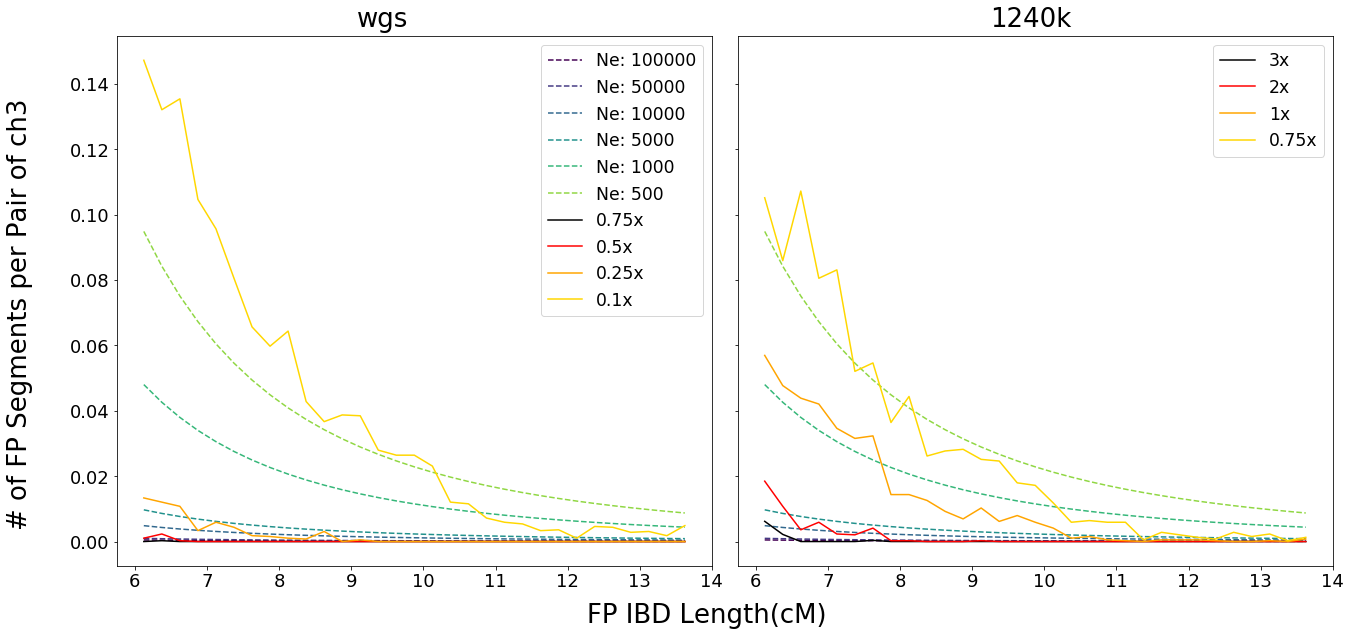

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import seaborn as sns
import pandas as pd
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 8), tight_layout=True)
bins = np.arange(6,14,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

p = plt.get_cmap('viridis')
Nes = [100000, 50000, 10000, 5000, 1000, 500]
for i, Ne in enumerate(Nes):
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    axs[0].plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=p(i/6))
    axs[1].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))

############# plot wgs results ################
nsamples = [13, 13, 13, 13]
covs = ['cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}

colors = ['black', 'red', 'orange', 'gold']
cmap_flare = sns.color_palette("flare", as_cmap=True)
for i, values in enumerate(zip(covs, nsamples, colors)):
    cov, nsample, color = values
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./wgs/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    axs[0].plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)), color=color, label=f'{cov2str[cov]}')

axs[0].legend(loc='upper right', fontsize='xx-large')

################################ plot 1240k results ###########################

covs = ['cov3', 'cov2', 'cov1', 'cov3over4']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x'}
nsamples = [11, 13, 13, 13]
colors = ['black', 'red', 'orange', 'gold']


for cov, nsample, color in zip(covs, nsamples, colors):
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./1240k/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    axs[1].plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)), color=color, label=f'{cov2str[cov]}')
axs[1].legend(loc='upper right', fontsize='xx-large')


axs[0].tick_params(axis='both', labelsize=18)
axs[1].tick_params(axis='both', labelsize=18)
fig.text(0.25, 1.01, 'wgs', ha='center', va='center', fontsize=26)
fig.text(0.75, 1.01, '1240k', ha='center', va='center', fontsize=26)
fig.text(0.5, -0.025, 'FP IBD Length(cM)', ha='center', va='center', fontsize=26)
fig.text(-0.03, 0.5, '# of FP Segments per Pair of ch3', ha='center', va='center', rotation='vertical', fontsize=26)
plt.savefig('FP_colorful.png', dpi=300, bbox_inches="tight")
plt.savefig('FP_colorful.pdf', dpi=300, bbox_inches="tight")

# mixed coverage 1240k

plotting row 0 and col 0
('cov3', 'cov2')
('cov3', 'cov1')
('cov3', 'cov3over4')
plotting row 0 and col 1
('cov3', 'cov2')
('cov2', 'cov1')
('cov2', 'cov3over4')
plotting row 1 and col 0
('cov3', 'cov1')
('cov2', 'cov1')
('cov1', 'cov3over4')
plotting row 1 and col 1
('cov3', 'cov3over4')
('cov2', 'cov3over4')
('cov1', 'cov3over4')


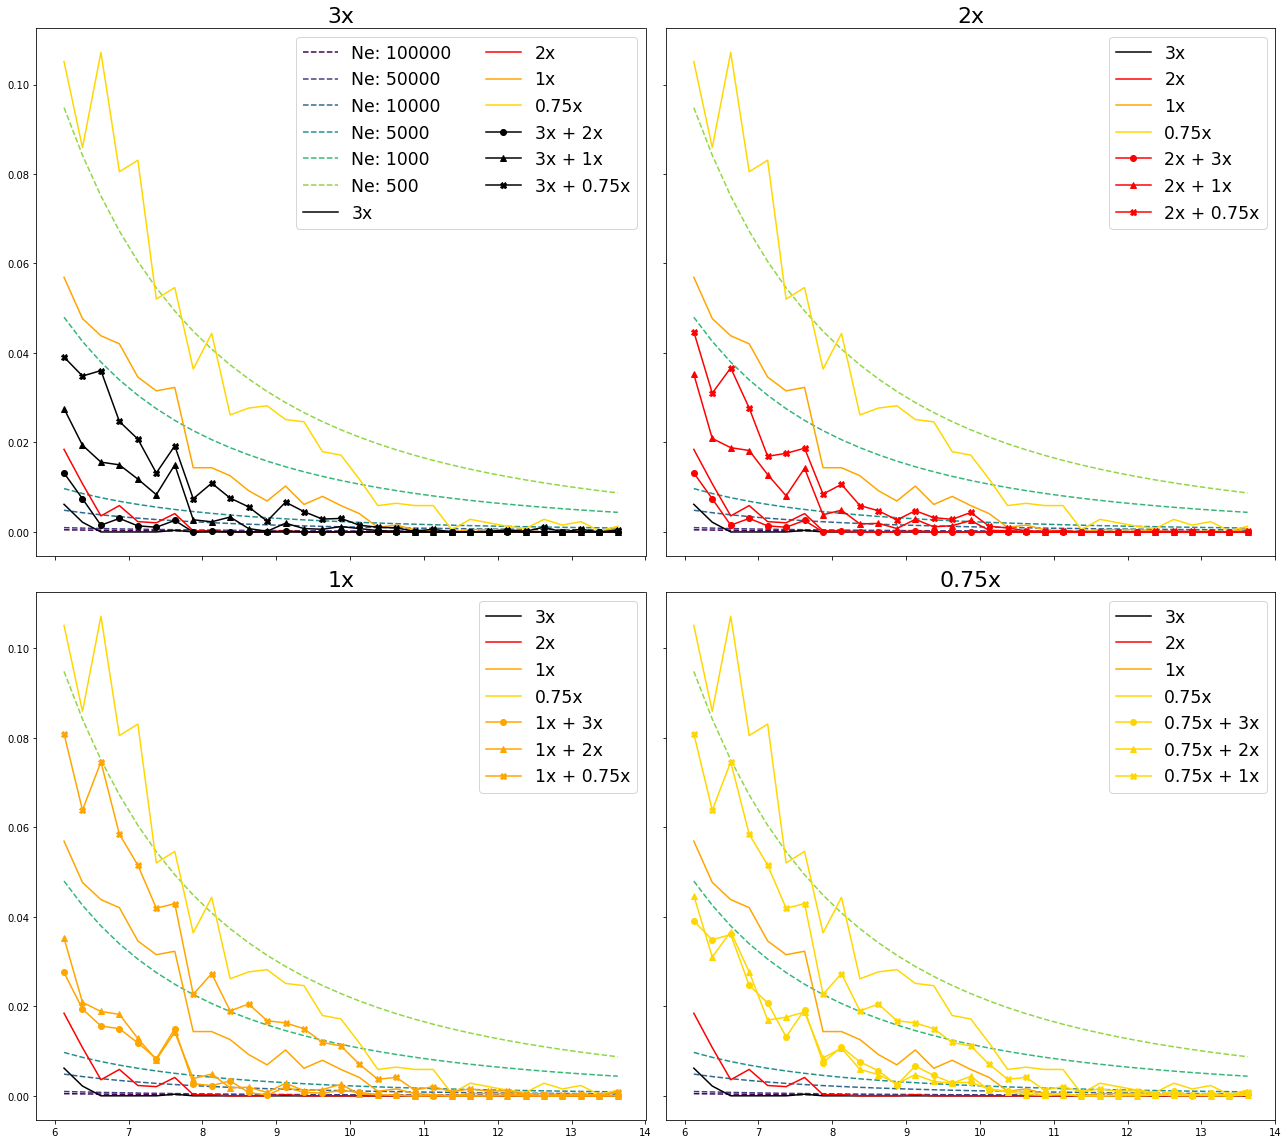

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import seaborn as sns
import pandas as pd
import itertools
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18, 16), tight_layout=True)
bins = np.arange(6,14,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

p = plt.get_cmap('viridis')
Nes = [100000, 50000, 10000, 5000, 1000, 500]
for i, Ne in enumerate(Nes):
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    axs[0,0].plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=p(i/6))
    axs[0,1].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))
    axs[1,0].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))
    axs[1,1].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))

########### plot 1240k with equal coverage on both samples #############

covs = ['cov3', 'cov2', 'cov1', 'cov3over4']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x'}
nsamples = {'cov3':11, 'cov2':13, 'cov1':13, 'cov3over4':13}
colors = {'cov3':'black', 'cov2':'red', 'cov1':'orange', 'cov3over4':'gold'}


for cov in covs:
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./1240k/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    npairs = nsamples[cov]*(nsamples[cov]-1)/2
    axs[0,0].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[0,1].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[1,0].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[1,1].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')

markerstyles = ['o', '^', 'X']
for i, cov in enumerate(covs):
    row, col = i//2, i%2
    print(f'plotting row {row} and col {col}')
    combos = list(itertools.combinations(covs, 2))
    combos_valid = [combo for combo in combos if combo[0] == cov or combo[1] == cov]
    assert(len(combos_valid) == len(markerstyles))
    for covpair, markerstyle in zip(combos_valid, markerstyles):
        print(covpair)
        cov1, cov2 = covpair
        if cov1 != cov and cov2 != cov:
            continue

        dfs = []
        for b in np.arange(1,51):
            df = pd.read_csv(f'./1240k/mixedCoverage/batch{b}/{cov1}_{cov2}/ch3.tsv', sep='\t')
            df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
            dfs.append(df)
        df = pd.concat(dfs)
        FPs = np.array(100*df['lengthM'])
        x, _ = np.histogram(FPs, bins=bins)
        nsample1, nsample2 = nsamples[cov1], nsamples[cov2]
        npairs = nsample1*nsample2 - min(nsample1, nsample2)

        cov2 = cov1 if cov1 != cov else cov2
        cov1 = cov
        axs[row, col].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], marker=markerstyle, label=f'{cov2str[cov1]} + {cov2str[cov2]}')
    
    axs[row, col].set_title(cov2str[cov], fontsize=22)
    if not (row == 0 and col == 0):
        axs[row, col].legend(loc='upper right', fontsize='xx-large')

    
axs[0,0].legend(loc='upper right', fontsize='xx-large', ncol=2)

plt.savefig('1240k.mixedcoverage.FP.png', dpi=300)

# mixed coverage wgs

plotting row 0 and col 0
('cov3over4', 'cov1over2')
('cov3over4', 'cov1over4')
('cov3over4', 'cov1over10')
plotting row 0 and col 1
('cov3over4', 'cov1over2')
('cov1over2', 'cov1over4')
('cov1over2', 'cov1over10')
plotting row 1 and col 0
('cov3over4', 'cov1over4')
('cov1over2', 'cov1over4')
('cov1over4', 'cov1over10')
plotting row 1 and col 1
('cov3over4', 'cov1over10')
('cov1over2', 'cov1over10')
('cov1over4', 'cov1over10')


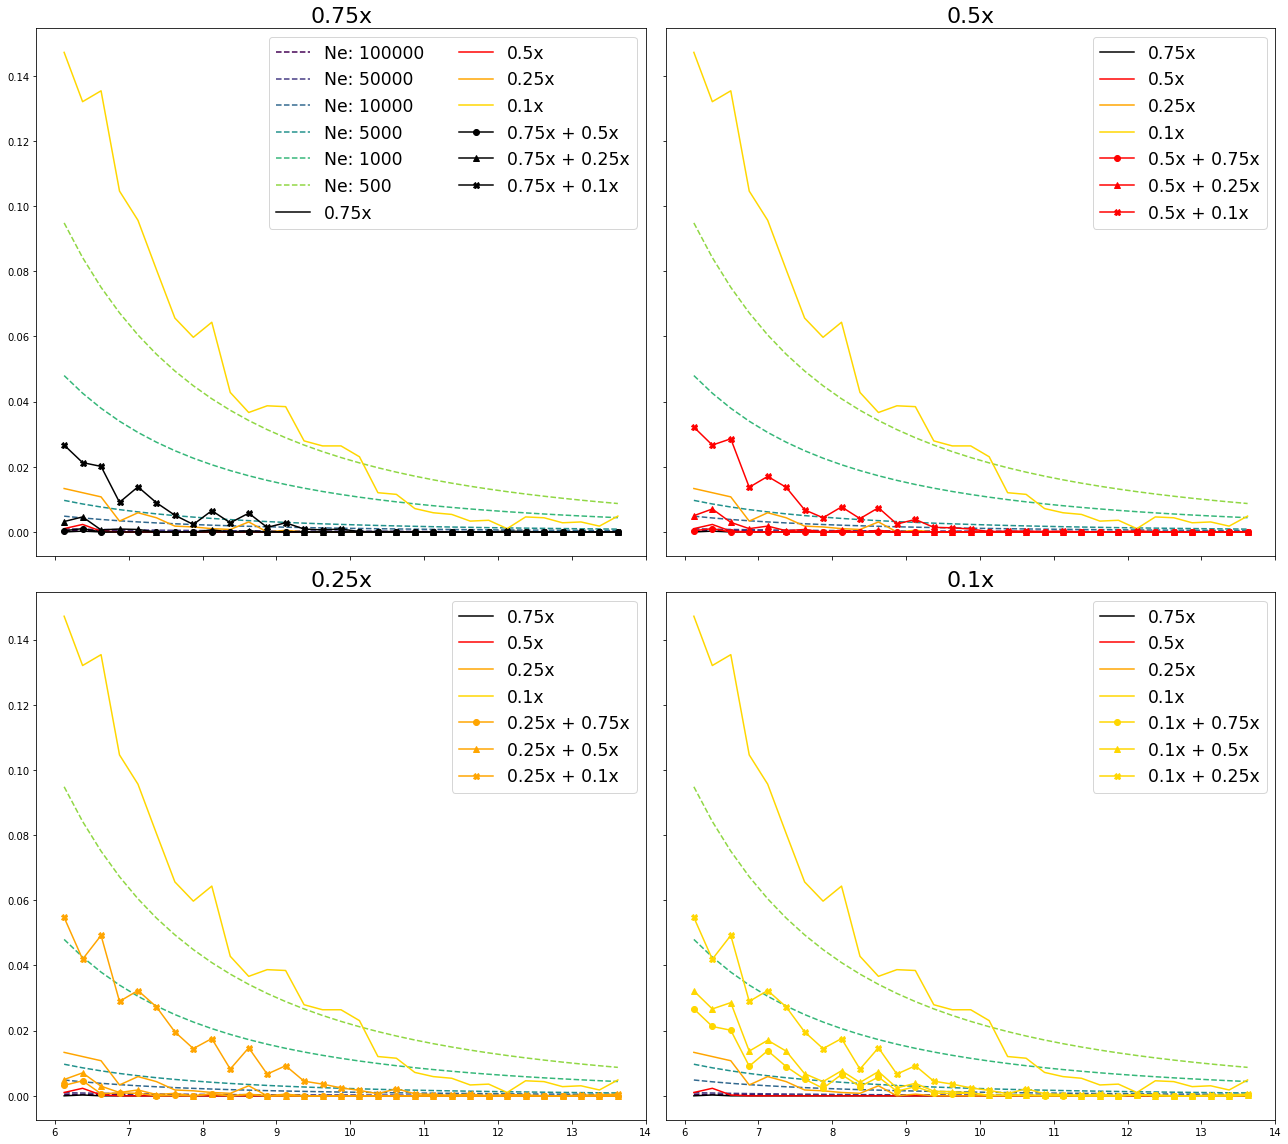

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import seaborn as sns
import pandas as pd
import itertools
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18, 16), tight_layout=True)
bins = np.arange(6,14,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

p = plt.get_cmap('viridis')
Nes = [100000, 50000, 10000, 5000, 1000, 500]
for i, Ne in enumerate(Nes):
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    axs[0,0].plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=p(i/6))
    axs[0,1].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))
    axs[1,0].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))
    axs[1,1].plot(binmidpoint, lambdas, linestyle='--', color=p(i/6))

########### plot wgs with equal coverage on both samples #############

covs = ['cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}
nsamples = {'cov3over4':13, 'cov1over2':13, 'cov1over4':13, 'cov1over10':13}
colors = {'cov3over4':'black', 'cov1over2':'red', 'cov1over4':'orange', 'cov1over10':'gold'}


for cov in covs:
    dfs = []
    for b in np.arange(1,51):
        df = pd.read_csv(f'./wgs/{cov}/batch{b}/ch3.tsv', sep='\t')
        df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
        dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)
    npairs = nsamples[cov]*(nsamples[cov]-1)/2
    axs[0,0].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[0,1].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[1,0].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')
    axs[1,1].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], label=f'{cov2str[cov]}')

markerstyles = ['o', '^', 'X']
for i, cov in enumerate(covs):
    row, col = i//2, i%2
    print(f'plotting row {row} and col {col}')
    combos = list(itertools.combinations(covs, 2))
    combos_valid = [combo for combo in combos if combo[0] == cov or combo[1] == cov]
    assert(len(combos_valid) == len(markerstyles))
    for covpair, markerstyle in zip(combos_valid, markerstyles):
        print(covpair)
        cov1, cov2 = covpair
        if cov1 != cov and cov2 != cov:
            continue
        if not os.path.exists(f'./wgs/mixedCoverage/batch{b}/{cov1}_{cov2}'):
            cov1, cov2 = cov2, cov1

        dfs = []
        for b in np.arange(1,51):
            df = pd.read_csv(f'./wgs/mixedCoverage/batch{b}/{cov1}_{cov2}/ch3.tsv', sep='\t')
            df = df[(df['End'] - df['Start'])/(100*df['lengthM']) >= 220]
            dfs.append(df)
        df = pd.concat(dfs)
        FPs = np.array(100*df['lengthM'])
        x, _ = np.histogram(FPs, bins=bins)
        nsample1, nsample2 = nsamples[cov1], nsamples[cov2]
        npairs = nsample1*nsample2 - min(nsample1, nsample2)

        cov2 = cov1 if cov1 != cov else cov2
        cov1 = cov
        axs[row, col].plot(binmidpoint, x/(len(dfs)*npairs), color=colors[cov], marker=markerstyle, label=f'{cov2str[cov1]} + {cov2str[cov2]}')
    
    axs[row, col].set_title(cov2str[cov], fontsize=22)
    if not (row == 0 and col == 0):
        axs[row, col].legend(loc='upper right', fontsize='xx-large')

    
axs[0,0].legend(loc='upper right', fontsize='xx-large', ncol=2)

plt.savefig('wgs.mixedcoverage.FP.png', dpi=300)